In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
from pygeotools.lib import iolib, warplib, geolib, timelib, malib
%matplotlib notebook

NB: commented out lines 35-36 in warplib.py, which deal with the resource package/module

In [2]:
# get filenames
fns = os.listdir('D:\Documents\Documents\Science\geohackweek2017\khumbu\8m')

# get file dates
year = [x[0:4] for x in fns]; year = list(map(int, year)); year = np.asarray(year)
month = [x[4:6] for x in fns]; month = list(map(int, month)); month = np.asarray(month)
day = [x[6:8] for x in fns]; day = list(map(int, day)); day = np.asarray(day)

# sort files by climatological year (which change at the summer monsoon)
# moonsoon year goes from fall through end of spring and is named for the fall calendar year
monsoon_year = year
monsoon_year[np.where(month<7)] = year[np.where(month<7)]-1
monsoon_year_uniq = np.unique(monsoon_year)
print(monsoon_year_uniq)

[2002 2012 2013 2014 2015 2016]


In [3]:
# loop through unique monsoon years
inpath = 'D:/Documents/Documents/Science/geohackweek2017/khumbu/8m'
outdir = 'D:\Documents\Documents\Science\geohackweek2017\khumbu\8m_stacks'
extent = '481378 3090067 492898 3099755' # xmin ymin xmax ymax
#extent = '481378 3082467 502497 3105187' # xmin ymin xmax ymax

stack_med =[]
for yr in monsoon_year_uniq:
    print(yr)
    # find indicies of all filenames for this year
    ind = np.where(monsoon_year == yr)[0]
    
    # get filenames
    dem_fn_list = []
    for i in ind:
        temp = inpath + '/' + fns[i]
        dem_fn_list.append(temp)
    
    # make dem stacks (currently just using the median)
    temp = malib.DEMStack(dem_fn_list, outdir=outdir, extent=extent, med=True, datestack=False)
    stack_med.append(temp.stack_med)

2002
Loading stack from: D:\Documents\Documents\Science\geohackweek2017\khumbu\8m_stacks\20030507_0445_1010010001E01600_1010010001E01500-DEM_8m_trans_20030507_0445_1010010001E01600_1010010001E01500-DEM_8m_trans_stack_1.npz
Loading ma stack
Loading stats
Loading trend
2012
Creating stack of 3 files

Warping all inputs to the following:
Resolution: 8.0
Extent: [481378.0, 3090067.0, 492898.0, 3099755.0]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 3: D:/Documents/Documents/Science/geohackweek2017/khumbu/8m/20121223_0456_1050410000E0AE00_1050410000E8C900-DEM_8m_trans.tif
nl: 1211 ns: 1440 res: 8.000
2 of 3: D:/Documents/Documents/Science/geohackweek2017/khumbu/8m/20121228_0506_102001001FB33300_102001002097D600-DEM_8m_trans.tif
nl: 1211 ns: 1440 res: 8.000
3 of 3: D:/Documents/Documents/Science/geohackweek2017/khumbu/8m/20130106_0456_102001001D141500_102001001DC53200-DEM_8m_trans.tif
nl: 1211 ns: 1440 res: 8.000

1 empty ds removed:
[ 'D:/Docu

C:\Program Files\Anaconda3\envs\rasterenv\lib\site-packages\numpy\lib\function_base.py:4011: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


Writing out stats
Creating datestack
Compute stack linear trend
Excluding pixels with count < 2
Excluding pixels with dt range < 0.90 days
Solving for trend
Writing out trend
Saving stack to: D:\Documents\Documents\Science\geohackweek2017\khumbu\8m_stacks\20121228_0506_102001001FB33300_102001002097D600-DEM_8m_trans_20130106_0456_102001001D141500_102001001DC53200-DEM_8m_trans_stack_2.npz
2013
Loading stack from: D:\Documents\Documents\Science\geohackweek2017\khumbu\8m_stacks\20131229_0456_10200100296A0900_10200100298D5F00-DEM_8m_trans_20140514_0454_102001003001E400_102001002F6B1000-DEM_8m_trans_stack_7.npz
Loading ma stack
Loading stats
Loading trend
2014
Creating stack of 9 files

Warping all inputs to the following:
Resolution: 8.0
Extent: [481378.0, 3090067.0, 492898.0, 3099755.0]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 9: D:/Documents/Documents/Science/geohackweek2017/khumbu/8m/20141018_0511_1050410011888400_1050410011888300-DEM_8

<IPython.core.display.Javascript object>


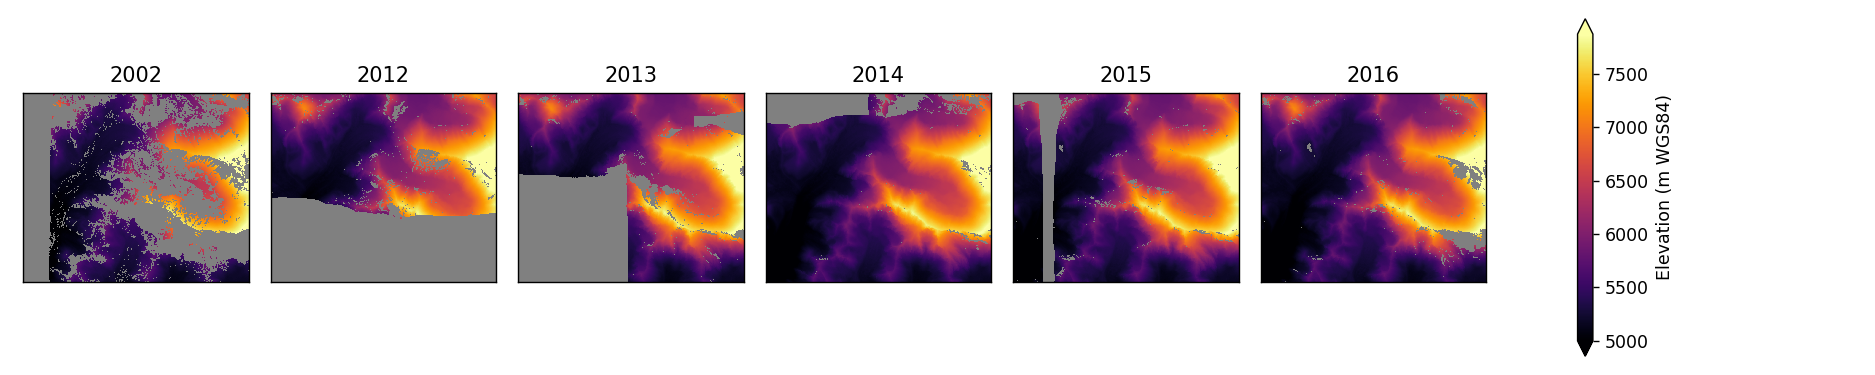

In [4]:
# plot DEMs
fig, axa = plt.subplots(1,len(stack_med), sharex=True, sharey=True, figsize=(15,3))
#fig, axa = plt.subplots(2,4, sharex=True, sharey=True, figsize=(15,3))

for n, ax in enumerate(axa.ravel()):
    #Gray background
    ax.set_facecolor('0.5')
    #Force aspect ratio to match images
    ax.set(adjustable='box-forced', aspect='equal')
    #Turn off axes labels/ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(monsoon_year_uniq[n])
    
im_list = [axa[i].imshow(stack_med[i], clim=malib.calcperc(stack_med[0], (2,98)), cmap='inferno') for i in range(len(monsoon_year_uniq))]
fig.tight_layout()
fig.colorbar(im_list[0],ax=axa.ravel().tolist(), label='Elevation (m WGS84)', extend='both')
plt.show()

In [86]:
# Calculate elevation and time differences
dh=[]
dt=[]
dh_title=[]
# do so for sequential year pairs
for i in np.arange(len(monsoon_year_uniq)-1):
    batman = stack_med[i+1] - stack_med[i]
    dh.append(batman)
    dh_title.append(str(monsoon_year_uniq[i]) + ' to ' + str(monsoon_year_uniq[i+1]))
    dt.append(monsoon_year_uniq[i+1] - monsoon_year_uniq[i])
    
# also do it for the total time period
dh.append(stack_med[-1] - stack_med[0])
dh_title.append(str(monsoon_year_uniq[0]) + ' to ' + str(monsoon_year_uniq[-1]))
dt.append(monsoon_year_uniq[-1] - monsoon_year_uniq[0])

# also do it for 2016 - 2012
dh.append(stack_med[-1] - stack_med[1])
dh_title.append(str(monsoon_year_uniq[1]) + ' to ' + str(monsoon_year_uniq[-1]))
dt.append(monsoon_year_uniq[-1] - monsoon_year_uniq[1])

<IPython.core.display.Javascript object>


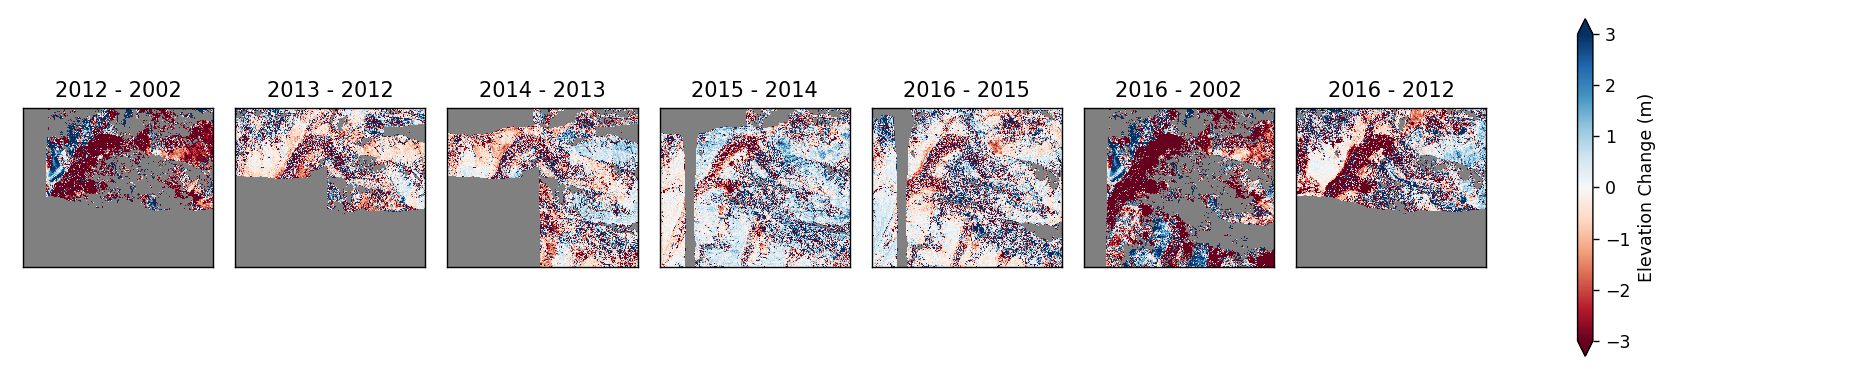

In [10]:
# plot differences
fig, axa = plt.subplots(1,len(dh), sharex=True, sharey=True, figsize=(15,3))
for n, ax in enumerate(axa.ravel()):
    #Gray background
    ax.set_facecolor('0.5')
    #Force aspect ratio to match images
    ax.set(adjustable='box-forced', aspect='equal')
    #Turn off axes labels/ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #ax.set_title(str(monsoon_year_uniq[n+1]) + ' - ' + str(monsoon_year_uniq[n]))
    ax.set_title(dh_title[n])
im_list = [axa[i].imshow(dh[i], clim=(-3, 3), cmap='RdBu') for i in range(len(dh))]
fig.tight_layout()
fig.colorbar(im_list[0],ax=axa.ravel().tolist(), label='Elevation Change (m)', extend='both')
plt.show()

<IPython.core.display.Javascript object>


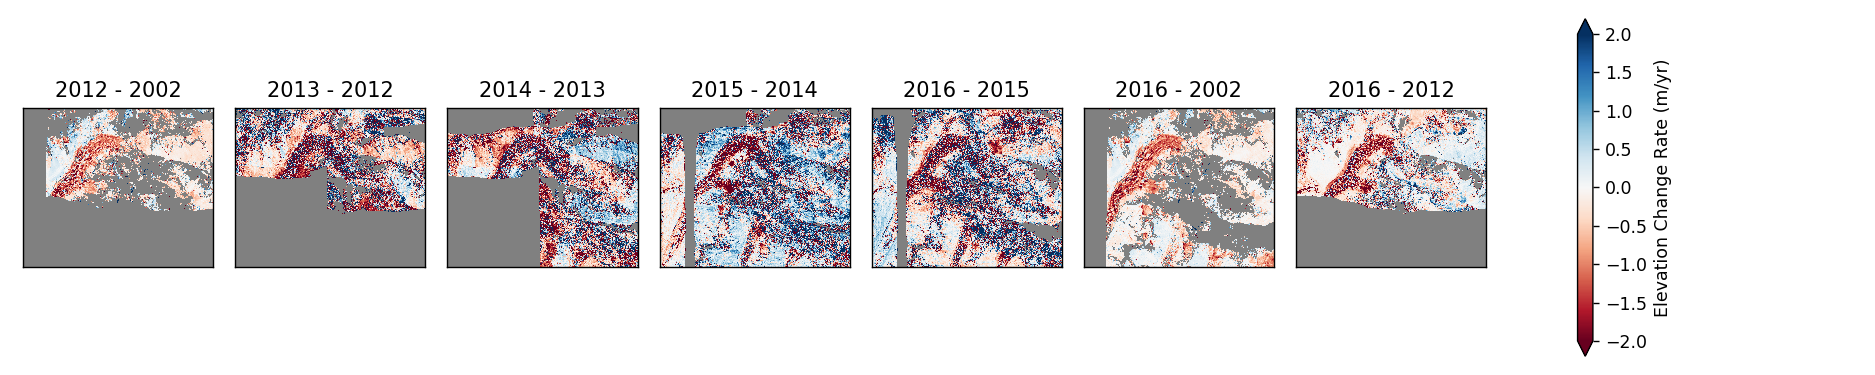

In [11]:
#Calculate annual rate of change
dhdt = np.ma.array(dh)/np.array(dt)[:,np.newaxis,np.newaxis]

# now plot them
fig, axa = plt.subplots(1,len(dhdt), sharex=True, sharey=True, figsize=(15,3))
for n, ax in enumerate(axa):
    #Gray background
    ax.set_facecolor('0.5')
    #Force aspect ratio to match images
    ax.set(adjustable='box-forced', aspect='equal')
    #Turn off axes labels/ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #ax.set_title(str(monsoon_year_uniq[n+1]) + ' - ' + str(monsoon_year_uniq[n]))
    ax.set_title(dh_title[n])
im_list = [axa[i].imshow(dhdt[i], clim=(-2, 2), cmap='RdBu') for i in range(len(dhdt))]
fig.tight_layout()
fig.colorbar(im_list[0],ax=axa.ravel().tolist(), label='Elevation Change Rate (m/yr)', extend='both')
plt.show()

Input shp srs: +proj=longlat +datum=WGS84 +no_defs 
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs 


<IPython.core.display.Javascript object>


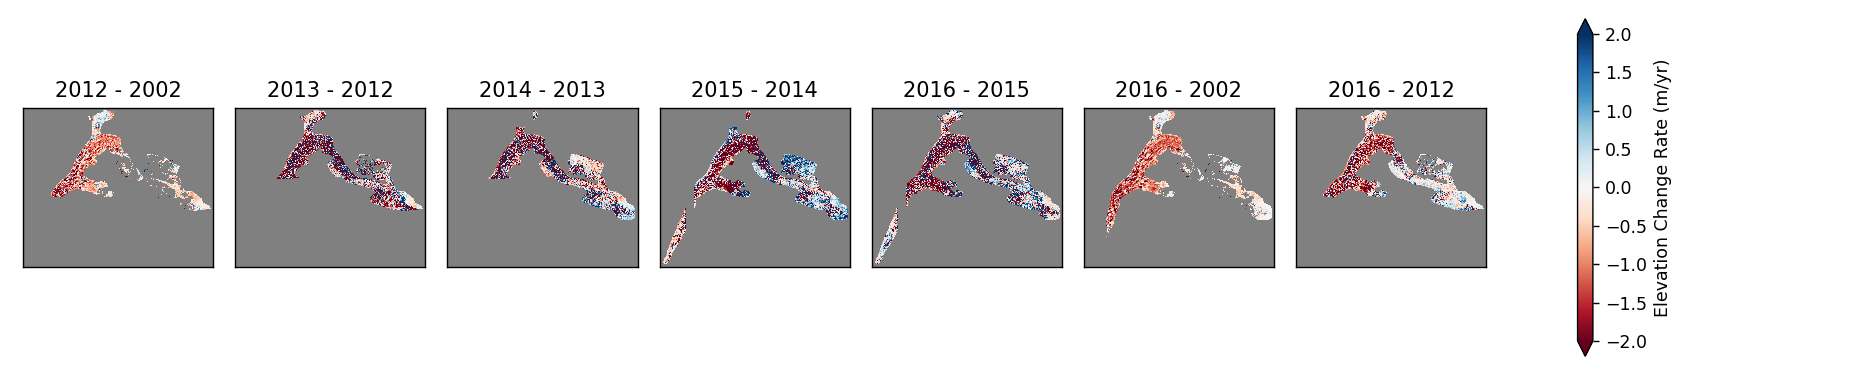

In [22]:
# Add shapefile mask for
shp_fn = 'D:\Documents\Documents\Science\geohackweek2017\shp\khumbu_rgi60_poly.shp'
dem_ds = temp.get_ds()

#Create binary mask from polygon shapefile to match our warped raster datasets
shp_mask = geolib.shp2array(shp_fn, dem_ds)

#Now apply the mask to each array 
dhdt_shpclip = [np.ma.array(dhdt[i], mask=shp_mask) for i in range(len(dhdt))]

# plot
fig, axa = plt.subplots(1,len(dhdt), sharex=True, sharey=True, figsize=(15,3))
for n, ax in enumerate(axa):
    #Gray background
    ax.set_facecolor('0.5')
    #Force aspect ratio to match images
    ax.set(adjustable='box-forced', aspect='equal')
    #Turn off axes labels/ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #ax.set_title(str(monsoon_year_uniq[n+1]) + ' - ' + str(monsoon_year_uniq[n]))
    ax.set_title(dh_title[n])
im_list = [axa[i].imshow(dhdt_shpclip[i], clim=(-2, 2), cmap='RdBu') for i in range(len(dhdt))]
fig.tight_layout()
fig.colorbar(im_list[0],ax=axa.ravel().tolist(), label='Elevation Change Rate (m/yr)', extend='both')
plt.show()


In [19]:
stack_med[0]

masked_array(data =
 [[-- -- -- ..., 6622.62646484375 6622.34228515625 6622.0810546875]
 [-- -- -- ..., 6622.33203125 6621.8779296875 6621.4794921875]
 [-- -- -- ..., 6622.1875 6621.501953125 6620.99755859375]
 ..., 
 [-- -- -- ..., 5190.07421875 5191.474609375 5193.20556640625]
 [-- -- -- ..., 5189.12451171875 5190.52001953125 5192.38720703125]
 [-- -- -- ..., 5188.56884765625 5190.0771484375 5191.93212890625]],
             mask =
 [[ True  True  True ..., False False False]
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]
 ..., 
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]],
       fill_value = 1e+20)

<IPython.core.display.Javascript object>


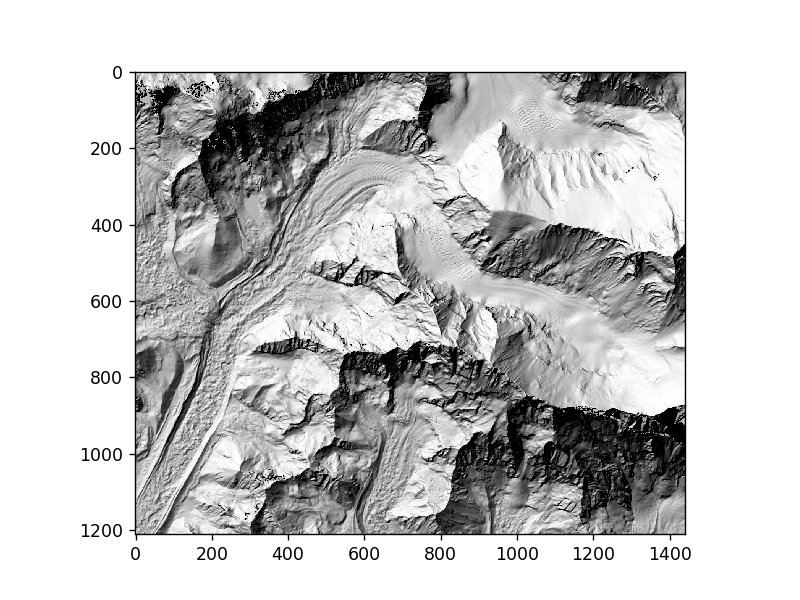

In [26]:
# Create hillshade
b = dem_ds.GetRasterBand(1)
all_med = np.ma.median(np.ma.array(stack_med), axis=0)
b.WriteArray(all_med)
dem_hs_ds = gdal.DEMProcessing('', dem_ds, 'hillshade', format='MEM')                              
dem_hs = iolib.ds_getma(dem_hs_ds)                              

# plot
fig = plt.figure()
plt.imshow(dem_hs, cmap='gray', clim=(1,255)) 
plt.show()

In [32]:
len(dhdt)

7

<IPython.core.display.Javascript object>


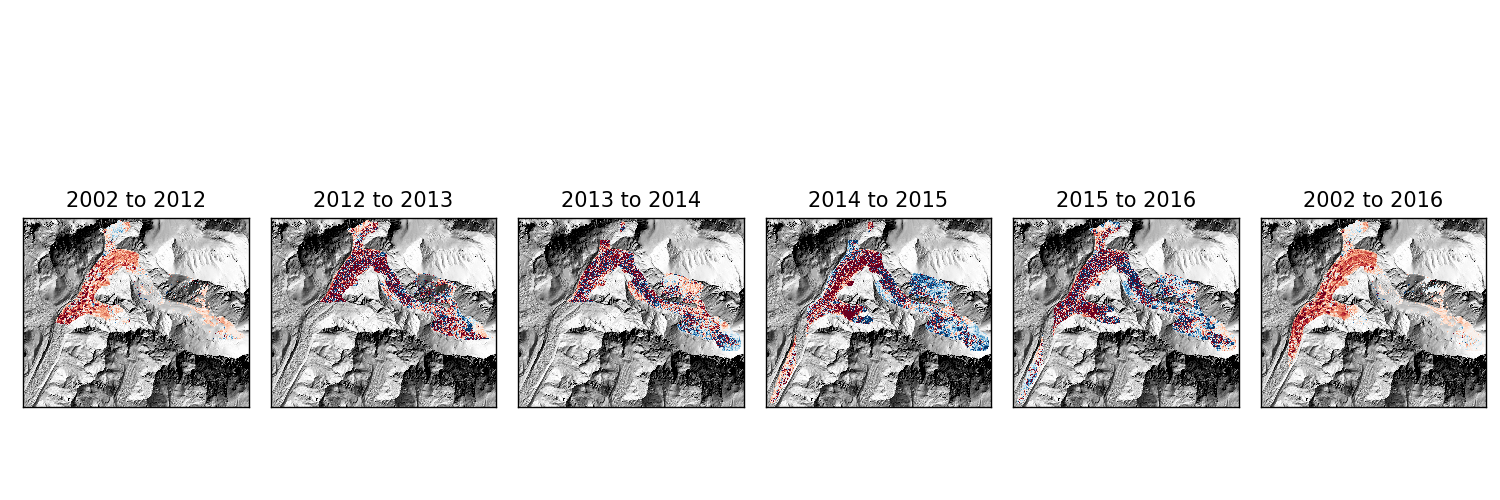

In [99]:
# plot
fig, axa = plt.subplots(1,len(monsoon_year_uniq), sharex=True, sharey=True, figsize=(15,5))

for n, ax in enumerate(axa):
    #Gray background
    ax.set_facecolor('0.5')
    #Force aspect ratio to match images
    ax.set(adjustable='box-forced', aspect='equal')
    #Turn off axes labels/ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #ax.set_title(str(monsoon_year_uniq[n+1]) + ' - ' + str(monsoon_year_uniq[n]))
    ax.set_title(dh_title[n])
    ax.imshow(dem_hs, cmap='gray', clim=(1,255))
im_list = [axa[i].imshow(dhdt_shpclip[i], clim=(-2, 2), cmap='RdBu') for i in range(len(monsoon_year_uniq))]
fig.tight_layout()
fig.colorbar(im_list[0],ax=axa.ravel().tolist(), label='Elevation Change Rate (m/yr)', extend='both', shrink=0.4)
plt.show()

In [100]:
plt.savefig('dhdt_6panel.png', dpi=300)

In [ ]:
# plot
fig, axa = plt.subplots(1,2, sharex=True, sharey=True)

for n, ax in enumerate(axa):
    #Gray background
    ax.set_facecolor('0.5')
    #Force aspect ratio to match images
    ax.set(adjustable='box-forced', aspect='equal')
    #Turn off axes labels/ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #ax.set_title(str(monsoon_year_uniq[n+1]) + ' - ' + str(monsoon_year_uniq[n]))
    ax.set_title(dh_title[n])
    ax.imshow(dem_hs, cmap='gray', clim=(1,255))
im_list = [axa[i].imshow(dhdt_shpclip[i], clim=(-2, 2), cmap='RdBu') for i in range()]
fig.tight_layout()
fig.colorbar(im_list[0],ax=axa.ravel().tolist(), label='Elevation Change Rate (m/yr)', extend='both', shrink=0.4)
plt.show()

<IPython.core.display.Javascript object>


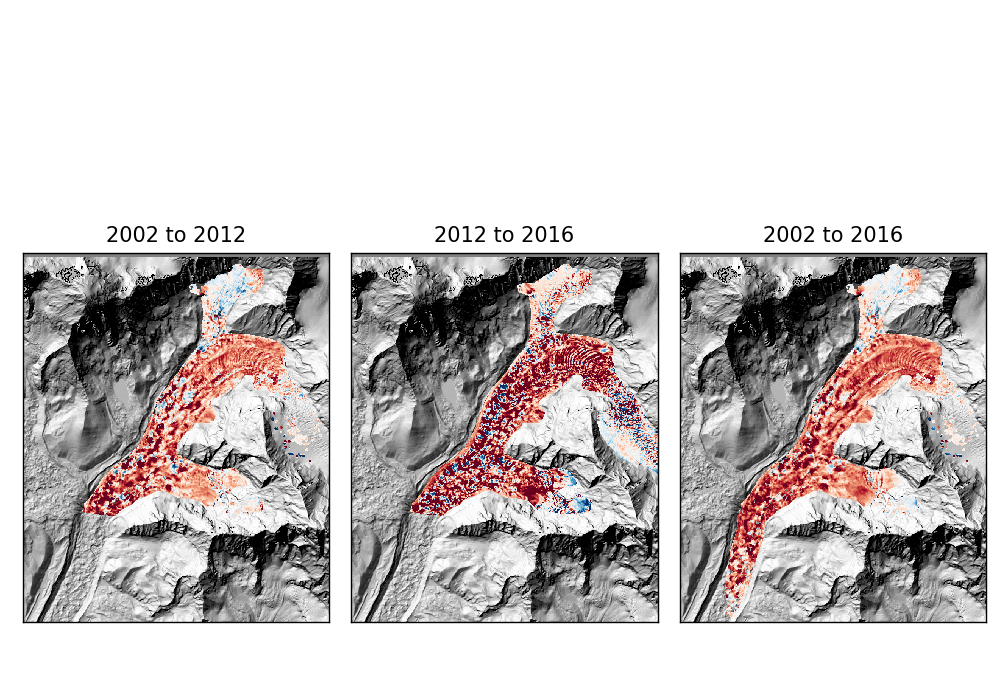

In [97]:
# plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.set_figheight(7)
fig.set_figwidth(10)

ax1.set_facecolor('0.5'); ax2.set_facecolor('0.5'); ax3.set_facecolor('0.5')
ax1.set(adjustable='box-forced', aspect='equal'); ax2.set(adjustable='box-forced', aspect='equal'); ax3.set(adjustable='box-forced', aspect='equal')
ax1.get_xaxis().set_visible(False); ax2.get_xaxis().set_visible(False); ax3.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False); ax2.get_yaxis().set_visible(False); ax3.get_yaxis().set_visible(False)
ax1.imshow(dem_hs, cmap='gray', clim=(1,255)); ax2.imshow(dem_hs, cmap='gray', clim=(1,255)); ax3.imshow(dem_hs, cmap='gray', clim=(1,255));
im = ax1.imshow(dhdt_shpclip[0], clim=(-2, 2), cmap='RdBu'); ax2.imshow(dhdt_shpclip[-1], clim=(-2, 2), cmap='RdBu'); ax3.imshow(dhdt_shpclip[-2], clim=(-2, 2), cmap='RdBu'); 
ax1.set_title(dh_title[0]); ax2.set_title(dh_title[-1]); ax3.set_title(dh_title[-2])

fig.tight_layout()
fig.colorbar(im, ax=[ax1, ax2, ax3], label='Elevation Change Rate (m/yr)', extend='both', shrink=0.3)
plt.show()

In [96]:
plt.savefig('test.png', dpi=300)